# Proyecto 03 - Procesamiento del Lenguaje Natural

Presenatdo por: ANAMARIA GARCIA DAZA

## Dataset: The Multilingual Amazon Reviews Corpus

**Recuerda descargar el dataset de [aquí](https://github.com/kang205/SASRec). Es un archivo .zip que contiene tres documentos. Más información sobre el dataset [aquí](https://registry.opendata.aws/amazon-reviews-ml/). Es importante que tengas en cuenta la [licencia](https://docs.opendata.aws/amazon-reviews-ml/license.txt) de este dataset.**



In [ ]:
pip install -U nltk 

     |████████████████████████████████| 1.5MB 5.7MB/s 
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [3]:
import itertools

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import nltk

#Esto sirve para configurar NLTK. La primera vez puede tardar un poco
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\any-0\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\any-0\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

##  Breve exploración del dataset

Revisamos los tres dataset para conocer como esta compuesto y cuales serian los features mas importantes para desarrollar el proyecto

In [4]:
# dataset = COMPLETAR
data1 = pd.read_json('dataset_es_dev.json', lines= True)
data1.head()
#dataset.shape

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless
1,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel
2,es_0144850,product_es_0356874,reviewer_es_0486447,1,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar,es,sports
3,es_0339629,product_es_0939832,reviewer_es_0894703,1,Utilicé las brocas de menor diámetro y se me d...,Brocas de mantequilla,es,home_improvement
4,es_0858362,product_es_0489066,reviewer_es_0887663,1,No me gusta su olor a viejo y aspecto malo,No me gusta,es,beauty


In [5]:
data1.shape

(5000, 8)

In [6]:
data2 = pd.read_json('dataset_es_test.json', lines= True)
data2.head()


,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0038754,product_es_0113523,reviewer_es_0580071,1,no me llego el articulo me lo mando por correo...,no me llego,es,wireless
1,es_0748979,product_es_0017036,reviewer_es_0819733,1,"la mensajería horrible, no compro mas",amazon sigue sin cumplir en las entregas,es,home
2,es_0411746,product_es_0138642,reviewer_es_0508607,1,Estoy muy decepcionado con el vendedor ya que ...,ESTAFA EN EL ENVÍO,es,toy
3,es_0786686,product_es_0170887,reviewer_es_0491157,1,Mi valoración no es sobre el producto sino sob...,Estafa de Amazon,es,home
4,es_0429700,product_es_0710642,reviewer_es_0008745,1,Pues tenía interés en este libro y probé la ve...,No conseguí pasar de la portada en Kindle,es,digital_ebook_purchase


In [7]:
data2.shape

(5000, 8)

In [8]:
dataset = pd.read_json('dataset_es_train.json', lines= True)
dataset.head()


,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes


In [9]:
dataset.shape

(200000, 8)

In [10]:
dataset.isna().sum()

review_id           0
product_id          0
reviewer_id         0
stars               0
review_body         0
review_title        0
language            0
product_category    0
dtype: int64

In [7]:
dataset.describe()

,stars
count,200000.000000
mean,3.000000
std,1.414217
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


## GRAFICA DE BARRAS

Teniendo presente el objetivo de visualizar los puntajes delos usuarios de la plataforma de Amazon que se encuentran como *stars* en este dataset( se eligio por tener mas aleatoriedad en los datos). Como se puede observar este se clasifica de 1 a 5.

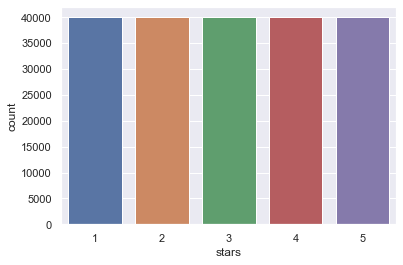

In [11]:
sns.countplot(dataset.stars)
plt.show()

In [9]:
#EXPLORACION BREVE DEL DATASET
# index_random = np.random.randint(COMPLETAR)
index_random = np.random.randint(0,high = dataset.shape[0])

# titular = dataset.COMPLETAR.COMPLETAR
titular = dataset.iloc[index_random].review_body

print(index_random, titular)

37257 El producto no ha llegado. Hace un mes que debió llegar. Ni el vendedor no Amazon me han dado una solución real. A punto de darme de baja de Amazon Prime....decepcionado.


In [10]:
print(index_random, dataset.iloc[index_random].stars)

37257 1


### Proceso de Tokenización
Segementacion de frase aleatoria

In [11]:
#1_sent_tokenizacion
titular_st = nltk.tokenize.sent_tokenize(titular)
titular_st

['El producto no ha llegado.',
 'Hace un mes que debió llegar.',
 'Ni el vendedor no Amazon me han dado una solución real.',
 'A punto de darme de baja de Amazon Prime....decepcionado.']

In [13]:
#2word- tokenizacion
titular_wt = nltk.tokenize.word_tokenize(titular)
titular_wt

['El',
 'producto',
 'no',
 'ha',
 'llegado',
 '.',
 'Hace',
 'un',
 'mes',
 'que',
 'debió',
 'llegar',
 '.',
 'Ni',
 'el',
 'vendedor',
 'no',
 'Amazon',
 'me',
 'han',
 'dado',
 'una',
 'solución',
 'real',
 '.',
 'A',
 'punto',
 'de',
 'darme',
 'de',
 'baja',
 'de',
 'Amazon',
 'Prime',
 '...',
 '.decepcionado',
 '.']

### Proceso de Normalización

 Convergen mucho más rápido en los datos normalizados

In [14]:
#1 Stopwords, Importar los `stopwords` del inglés e imprimirlos.


In [78]:
stopwords = nltk.corpus.stopwords.words('spanish')
stopwords = [palabra for palabra in stopwords if 'no' not in palabra]
stopwords[:10]

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se']

In [79]:
#Eliminar del titular elegido los stopwords.
titular_wt_sin_sw = [word for word in titular_wt if word not in stopwords]
titular_wt_sin_sw

['El',
 'producto',
 'no',
 'llegado',
 '.',
 'Hace',
 'mes',
 'debió',
 'llegar',
 '.',
 'Ni',
 'vendedor',
 'no',
 'Amazon',
 'dado',
 'solución',
 'real',
 '.',
 'A',
 'punto',
 'darme',
 'baja',
 'Amazon',
 'Prime',
 '...',
 '.decepcionado',
 '.']

In [80]:
list(set(titular_wt) - set(titular_wt_sin_sw))

['ha', 'un', 'que', 'una', 'el', 'me', 'han', 'de']

In [81]:
#Frecuencia de palabaras
freq = nltk.FreqDist(titular_wt_sin_sw)
freq

FreqDist({'.': 4,
          '...': 1,
          '.decepcionado': 1,
          'A': 1,
          'Amazon': 2,
          'El': 1,
          'Hace': 1,
          'Ni': 1,
          'Prime': 1,
          'baja': 1,
          'dado': 1,
          'darme': 1,
          'debió': 1,
          'llegado': 1,
          'llegar': 1,
          'mes': 1,
          'no': 2,
          'producto': 1,
          'punto': 1,
          'real': 1,
          'solución': 1,
          'vendedor': 1})

### No-SARCASMO
Palabfas o frases que no componen el sarcasmo de lenguaje natural

In [84]:
#No-sarcasmo
filtrar = []
if True:
    filtrar.append("u")
    filtrar.append("new")

In [85]:
dataset_no_sarcasmo = dataset[dataset.stars==1]
dataset_no_sarcasmo.head()

,review_body,stars,titular_lemm
0,Nada bueno se me fue ka pantalla en menos de 8...,1,bueno pantalla menos meses recibido respuesta ...
1,"Horrible, nos tuvimos que comprar otro porque ...",1,horrible comprar sabemos ingl inform tico desp...
2,Te obligan a comprar dos unidades y te llega s...,1,obligan comprar unidades llega solo forma recl...
3,"No entro en descalificar al vendedor, solo pue...",1,entro descalificar vendedor solo puedo decir t...
4,Llega tarde y co la talla equivocada,1,llega tarde talla equivocada


In [86]:
todos_titulares_no_sarcasmo = []

for i in range(dataset_no_sarcasmo.shape[0]):
    # titular = COMPLETAR #seleccionar el titular
    titular = dataset_no_sarcasmo.iloc[i].review_body
    
    # titular = COMPLETAR # Tokenizar con RegexpTokenizer
    titular = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(titular)
    
    # titular = COMPLETAR # Filtrar por stopwords
    titular = [word for word in titular if word not in stopwords]
    
    titular = [word for word in titular if word not in filtrar]
    
    # todos_titulares_no_sarcasmo.COMPLETAR(COMPLETAR) #agregar el resultado a la lista     
    todos_titulares_no_sarcasmo.append(titular)  

In [87]:
# Esta celda convierte una lista de listas en una unica lista
todos_titulares_no_sarcasmo = list(itertools.chain(*todos_titulares_no_sarcasmo))
todos_titulares_no_sarcasmo[:10]

['Nada',
 'bueno',
 'ka',
 'pantalla',
 'menos',
 '8',
 'meses',
 'no',
 'recibido',
 'respuesta']

In [88]:
#FreqDist
# freq_no_sarcasmo = nltk.COMPLETAR(COMPLETAR)
freq_no_sarcasmo = nltk.FreqDist(todos_titulares_no_sarcasmo)
freq_no_sarcasmo

FreqDist({'Nada': 411,
          'bueno': 508,
          'ka': 4,
          'pantalla': 1743,
          'menos': 1495,
          '8': 314,
          'meses': 1951,
          'no': 33068,
          'recibido': 1757,
          'respuesta': 432,
          'fabricante': 187,
          'Horrible': 103,
          'nos': 444,
          'comprar': 1662,
          'nosotros': 44,
          'sabemos': 20,
          'inglés': 105,
          'informático': 4,
          'después': 1230,
          'hora': 486,
          'capaz': 87,
          'instalarlo': 73,
          'Te': 82,
          'obligan': 20,
          'dos': 3209,
          'unidades': 181,
          'llega': 756,
          'solo': 2130,
          'forma': 546,
          'reclamar': 213,
          'autentica': 41,
          'estafa': 411,
          'compreis': 102,
          'No': 13605,
          'entro': 15,
          'descalificar': 1,
          'vendedor': 2247,
          'puedo': 1563,
          'decir': 564,
          'tras': 322,

In [89]:
# googlear: how to get pandas dataframe from freqdist
# df_no_sarcasmo = COMPLETAR
df_no_sarcasmo = pd.DataFrame(list(freq_no_sarcasmo.items()), columns = ["Word","Frequency"])
df_no_sarcasmo.head()

,Word,Frequency
0,Nada,411
1,bueno,508
2,ka,4
3,pantalla,1743
4,menos,1495


In [90]:
# ordenar por frecuencia
# df_no_sarcasmo.COMPLETAR(COMPLETAR)
df_no_sarcasmo.sort_values('Frequency',ascending=False, inplace = True)
df_no_sarcasmo.head()

,Word,Frequency
7,no,33068
33,No,13605
42,producto,6735
76,El,5266
113,bien,4397


In [91]:
df_no_sarcasmo.reset_index(drop = True, inplace=True)
df_no_sarcasmo.head()

,Word,Frequency
0,no,33068
1,No,13605
2,producto,6735
3,El,5266
4,bien,4397


## GRAFICA DE BARRAS-frecuencia No-sarcasmo
Frecuencia en las que se usan la siguientes palabras en donde se eviedncia la palabra *no* como las mas usada


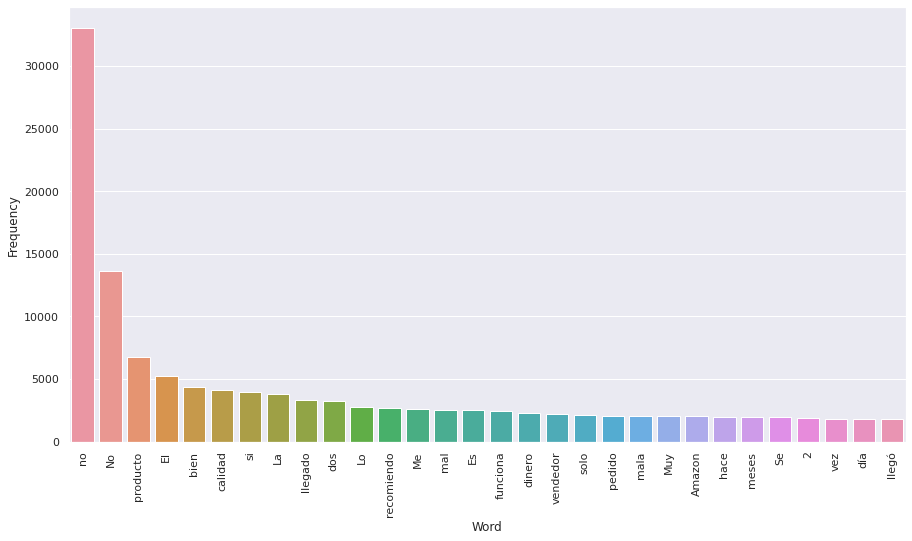

In [92]:
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_no_sarcasmo.iloc[:30].Word, y = df_no_sarcasmo.iloc[:30].Frequency)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

### SARCASMO
Verificamos las palabras que se usan en este dataset para este tipo de expresion o lenguaje

In [93]:
#SARCASMO
dataset_sarcasmo = dataset[dataset.stars==2]
dataset_sarcasmo.head()

,review_body,stars,titular_lemm
40000,"Los tornillos no ajustan bien, se caen. No lo ...",2,tornillos ajustan bien caen volver comprar
40001,Si haces varias impresiones seguidas aparecen ...,2,haces varias impresiones seguidas aparecen bor...
40002,es pequeño no coincide con la pantalla del a1,2,peque coincide pantalla
40003,No lleva nada para trasportarla y es un poco r...,2,lleva trasportarla gida
40004,"a ver si me explico , su software reconoce las...",2,explico software reconoce aparecen software de...


In [95]:
todos_titulares_sarcasmo = []
for i in range(dataset_sarcasmo.shape[0]):
    titular = dataset_sarcasmo.iloc[i].review_body
    titular = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(titular)
    titular = [word for word in titular if word not in stopwords]
    titular = [word for word in titular if word not in filtrar]

    todos_titulares_sarcasmo.append(titular)

In [96]:
# todos_titulares_sarcasmo = COMPLETAR
todos_titulares_sarcasmo = list(itertools.chain(*todos_titulares_sarcasmo))
todos_titulares_sarcasmo[0:10]

['Los',
 'tornillos',
 'no',
 'ajustan',
 'bien',
 'caen',
 'No',
 'volvería',
 'comprar',
 'Si']

In [97]:
freq_sarcasmo = nltk.FreqDist(todos_titulares_sarcasmo)
freq_sarcasmo

FreqDist({'Los': 1278,
          'tornillos': 363,
          'no': 32883,
          'ajustan': 101,
          'bien': 9462,
          'caen': 156,
          'No': 9909,
          'volvería': 550,
          'comprar': 1601,
          'Si': 1067,
          'haces': 63,
          'varias': 420,
          'impresiones': 12,
          'seguidas': 16,
          'aparecen': 71,
          'borrosas': 5,
          'zonas': 138,
          'imprime': 25,
          'alguna': 350,
          'zona': 263,
          'negro': 319,
          've': 1032,
          'homogenea': 2,
          'pequeño': 1462,
          'coincide': 89,
          'pantalla': 2000,
          'a1': 4,
          'lleva': 505,
          'trasportarla': 1,
          'rígida': 69,
          'ver': 1056,
          'si': 5529,
          'explico': 16,
          'software': 60,
          'reconoce': 116,
          '2': 1729,
          '4': 823,
          'Ghz': 2,
          '5': 761,
          'decir': 664,
          'doble': 161,
   

In [98]:
df_sarcasmo = pd.DataFrame(list(freq_sarcasmo.items()), columns = ["Word","Frequency"])
df_sarcasmo.head()

,Word,Frequency
0,Los,1278
1,tornillos,363
2,no,32883
3,ajustan,101
4,bien,9462


In [99]:
df_sarcasmo.sort_values('Frequency',ascending=False, inplace = True)
df_sarcasmo.head()

,Word,Frequency
2,no,32883
6,No,9909
4,bien,9462
77,El,6745
97,La,5632


In [100]:
df_sarcasmo.reset_index(drop = True, inplace=True)
df_sarcasmo.head()

,Word,Frequency
0,no,32883
1,No,9909
2,bien,9462
3,El,6745
4,La,5632


## GRAFICA DE BARRAS- Frecuencia Sarcasmo.


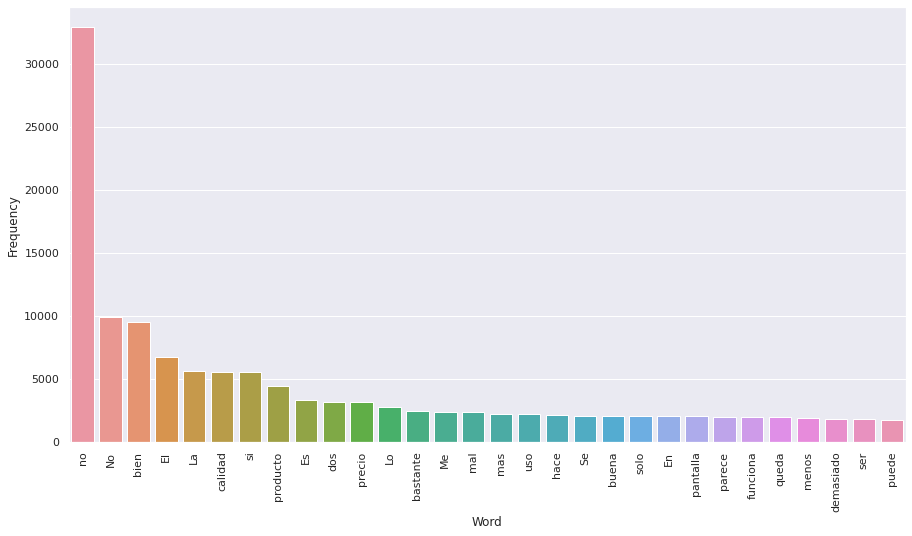

In [101]:
plt.figure(figsize = (15,8))
# COMPLETAR
plot = sns.barplot(x  = df_sarcasmo.iloc[:30].Word, y = df_sarcasmo.iloc[:30].Frequency)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

In [102]:
filtrar = []
if False:
    filtrar.append("u")
    filtrar.append("new")

### Stemming
Extraemos la raíz de una palabra. Este proceso se realiza porque la raíz de una palabra puede aparecer más veces en un texto.

In [103]:
#tomar sola las columnas, stars  y review_body
dataset = dataset.loc[:,('review_body', 'stars')]
dataset.dropna(axis=0, inplace=True)  # Si hay alguna nan, eliminamos esa instancia
dataset.head()

,review_body,stars
0,Nada bueno se me fue ka pantalla en menos de 8...,1
1,"Horrible, nos tuvimos que comprar otro porque ...",1
2,Te obligan a comprar dos unidades y te llega s...,1
3,"No entro en descalificar al vendedor, solo pue...",1
4,Llega tarde y co la talla equivocada,1


In [104]:
import re

# Importamos la función que nos permite Stemmizar de nltk y definimos el stemmer
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

# Traemos nuevamente las stopwords
# stopwords = nltk.COMPLETAR
stopwords = nltk.corpus.stopwords.words('spanish')

In [105]:
# Recorremos todos los titulos y le vamos aplicando la Normalizacion y luega el Stemming a cada uno
titular_list=[]

for titular in dataset.review_body:
    # Vamos a reemplzar los caracteres que no sean leras por espacios
    titular = re.sub("[^a-zA-Z]"," ",str(titular))
    
    # Pasamos todo a minúsculas
    titular = titular.lower()
    
    # Tokenizamos para separar las palabras del titular
    # titular=nltk.COMPLETAR
    titular = nltk.word_tokenize(titular)
    
    # Eliminamos las palabras de menos de 3 letras
    titular = [palabra for palabra in titular if len(palabra)>3]
    
    # Sacamos las Stopwords
    # titular = [COMPLETAR for COMPLETAR in COMPLETAR if not COMPLETAR in COMPLETAR]
    titular = [palabra for palabra in titular if not palabra in stopwords] 
    
    ## Hasta acá Normalizamos, ahora a stemmizar:
    
    # Aplicamos la funcion para buscar la raiz de las palabras
    # titular = [stemmer.stem(COMPLETAR) for COMPLETAR in COMPLETAR]
    titular = [stemmer.stem(palabra) for palabra in titular]    
    
    # Por ultimo volvemos a unir el titular
    titular = " ".join(titular)
    
    # Vamos armando una lista con todos los titulares
    # titular_list.append(COMPLETAR)
    titular_list.append(titular)

In [106]:
#Agregamos al dataset una columna llamado titular_stem que contenga los titulares stemmizados
dataset["titular_stem"] = titular_list
dataset.tail()

,review_body,stars,titular_stem
199995,Mando funciona perfectamente y cumple con toda...,5,mando funciona perfectament cumpl toda funcion...
199996,"Compré la batería con cierta reticencia, pero ...",5,compr bater cierta reticencia result instalar ...
199997,Buena calidad. Satisfecha con la compra.,5,buena calidad satisfecha compra
199998,Perfecto para el cumple de mi hijo,5,perfecto cumpl hijo
199999,"Súper bien! Las brochas son buenas, no sé meno...",5,bien brocha buena meno pelito quiz pesan chula...


In [107]:
#Armamos un nuevo dataset llamado dataset_stem que contenga solo las columnas titular_stem e is_sarcastic
dataset_stem = dataset.loc[:,('titular_stem', 'stars')]
dataset_stem.dropna(axis=0,inplace=True)  # Por si quedaron titulares vacios
dataset_stem.head()

,titular_stem,stars
0,bueno pantalla meno mese recibido respuesta fa...,1
1,horribl comprar sabemo ingl inform tico despu ...,1
2,obligan comprar unidad llega solo forma reclam...,1
3,entro descalificar vendedor solo puedo decir t...,1
4,llega tard talla equivocada,1


## Lemmatization

Otra manera de llevar distintas palabras a un raíz común en la que comparten un significado es mediante el procezo de 'Lemmatizar' el texto. Es similar al 'Stemming' pero un poco más educado, ya que intenta realizar el proceso teniendo en cuenta cuál es el rol que la palabra cumple en el texto. Esto quiere decir que su accionar será distinto si la palabra a lemmantizar está actuando como verbo, sustantivo, etc. 

IMPORTANTE DESCARGAR LAS LIBRERIA NTLK, para este proceso

In [108]:
import re

# Importamos el lemmatizar de NLTK, y creamos el objeto
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [109]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

True

In [111]:
from nltk.corpus import wordnet

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [112]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Importamos esta libreria que nos permite reemplzar caracteres
import re

# dataset = COMPLETAR
#dataset = pd.read_json('data/DS_Encuentro_39_Sarcasm_Headlines_Dataset.json', lines= True)

# dataset = COMPLETAR
dataset = pd.concat([dataset.review_body,dataset.stars],axis=1)

dataset.dropna(axis=0,inplace=True)

# Traemos nuevamente las stopwords
# stopwords = COMPLETAR
stopwords = nltk.corpus.stopwords.words('spanish')

In [113]:
titular_list=[]
for titular in dataset.review_body:
    # Vamos a reemplzar los caracteres que no sean leras por espacios
    # titular = COMPLETAR
    titular=re.sub("[^a-zA-Z]"," ",str(titular))
    
    # Pasamos todo a minúsculas
    # titular = COMPLETAR
    titular=titular.lower()
    
    # Tokenizamos para separar las palabras
    # titular = COMPLETAR
    titular=nltk.word_tokenize(titular)
    
    # Aplicamos el Lemmatizer (Esto puede tardar un ratito)
    frase_lemma = [wordnet_lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in titular]
    
    # Eliminamos las palabras d emenos de 3 letras
    # titular = COMPLETAR
    titular = [palabra for palabra in titular if len(palabra)>3]
    
    # Sacamos las Stopwords
    # titular = COMPLETAR
    titular = [palabra for palabra in titular if not palabra in stopwords]
    
    # Por ultimo volvemos a unir el titular
    titular=" ".join(titular)
    #dataset["titular_normalizado"] = titular_list
    titular_list.append(titular)

In [114]:
dataset["titular_lemm"] = titular_list
dataset.tail()

,review_body,stars,titular_lemm
199995,Mando funciona perfectamente y cumple con toda...,5,mando funciona perfectamente cumple todas func...
199996,"Compré la batería con cierta reticencia, pero ...",5,compr bater cierta reticencia result instalar ...
199997,Buena calidad. Satisfecha con la compra.,5,buena calidad satisfecha compra
199998,Perfecto para el cumple de mi hijo,5,perfecto cumple hijo
199999,"Súper bien! Las brochas son buenas, no sé meno...",5,bien brochas buenas menos pelitos quiz pesan c...


In [115]:
dataset_lemm = dataset.loc[:,('titular_lemm', 'stars')]
dataset_lemm.dropna(axis=0,inplace=True)  # Por si quedaron titulares vacios
dataset_lemm.head()

,titular_lemm,stars
0,bueno pantalla menos meses recibido respuesta ...,1
1,horrible comprar sabemos ingl inform tico desp...,1
2,obligan comprar unidades llega solo forma recl...,1
3,entro descalificar vendedor solo puedo decir t...,1
4,llega tarde talla equivocada,1


 ## Vectorizar

In [116]:
#a. Tomamos la lista de palabras y el vector que nos dice si es o no sarcástico el título 

# Tomamso la lista de palabras y el vector que nos dice si es o no sarcastico el titulo
# list_titulos = list(COMPLETAR)
list_titulos = list(dataset_lemm['titular_lemm'].values)

# is_sarc = COMPLETAR
is_sarc = dataset_lemm['stars'].values

## Para probar con Stemmizer:
#list_titulos = list(dataset_stem'titular_stem'].values)
#is_sarc = dataset_stem['is_sarcastic'].values

In [117]:
#b. Preparamos el conversor de bag of words a vectores que traemos de sklearn. CountVectorizer posee varias funcionalidades que pueden determinarse a partir 
#de parámetros. Les recomendamos fuertemente leer su documentación.


from sklearn.feature_extraction.text import CountVectorizer

# Usaremos solo las 1000 palabras con mas frecuencia en todo el corpus para generar los vectores
max_features = 1000

# Es decir que cada instancia tendrá 1000 features
cou_vec = CountVectorizer(max_features=max_features) # stop_words="english" , ngram_range=(1, 2)

In [118]:
#c. Ahora sí, vamos generarnos los vectores para cada título a partir del corpus total.


matriz_titulos = cou_vec.fit_transform(list_titulos)

# Tomamos las palabras
all_words = cou_vec.get_feature_names()

# Vizualizamos las 50 palabras mas usadas
print("50 palabras mas usadas: ", all_words[0:50])

50 palabras mas usadas:  ['abajo', 'abierta', 'abierto', 'abre', 'abrir', 'absoluto', 'acaba', 'acabado', 'acabados', 'acabo', 'accesorios', 'aceite', 'aceptable', 'aconsejo', 'adapta', 'adaptador', 'adecuado', 'adem', 'ademas', 'adhesivo', 'agarre', 'agradable', 'agua', 'aguanta', 'agujero', 'agujeros', 'ahora', 'aire', 'ajusta', 'ajustan', 'ajustar', 'ajuste', 'alguien', 'alguna', 'alguno', 'alta', 'altavoz', 'alto', 'altura', 'amazon', 'ancho', 'anterior', 'anuncio', 'apaga', 'aparato', 'aparece', 'aparte', 'apenas', 'aplicaci', 'apple']


 ## Modelar

In [119]:
#a. Primero, como siempre, separamos en test y train.


from sklearn.model_selection import train_test_split

x = matriz_titulos.toarray()
y = is_sarc

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [120]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def confusion(ytest,y_pred):
    names=["No Sarcastico","Sarcastico"]
    cm=confusion_matrix(ytest,y_pred)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

### Naive Bayes
a. Empecemos por un simple Naive Bayes para tener un benchmark de referencia para el accuracy.

In [121]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(xtrain,ytrain)

# print("acc : ", COMPLETAR)
print("acc : ", nb.score(xtest,ytest))

acc :  0.38345


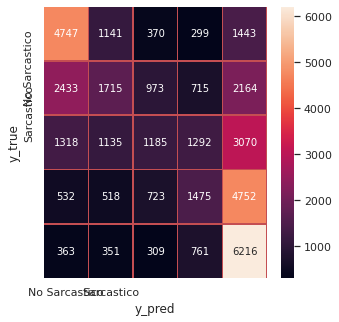

In [122]:
# y_pred = COMPLETAR
y_pred = nb.predict(xtest)
confusion(ytest,y_pred)

### Random Forest
a. Veamos cómo funciona un random forest para predecir el sarcasmo de una nota en base a su titular.

In [123]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# rf = COMPLETAR 
rf = RandomForestClassifier(n_estimators = 50, random_state=42)
# rf.fit(COMPLETAR)
rf.fit(xtrain,ytrain)

# print("acc : ", COMPLETAR)
print("acc: ",rf.score(xtest,ytest))

acc:  0.417925


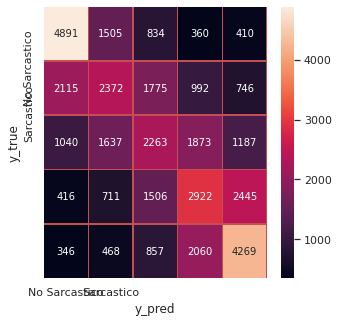

In [124]:
#MATRIZ CONFUSION
# y_pred = COMPLETAR
y_pred = rf.predict(xtest)
confusion(ytest,y_pred)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


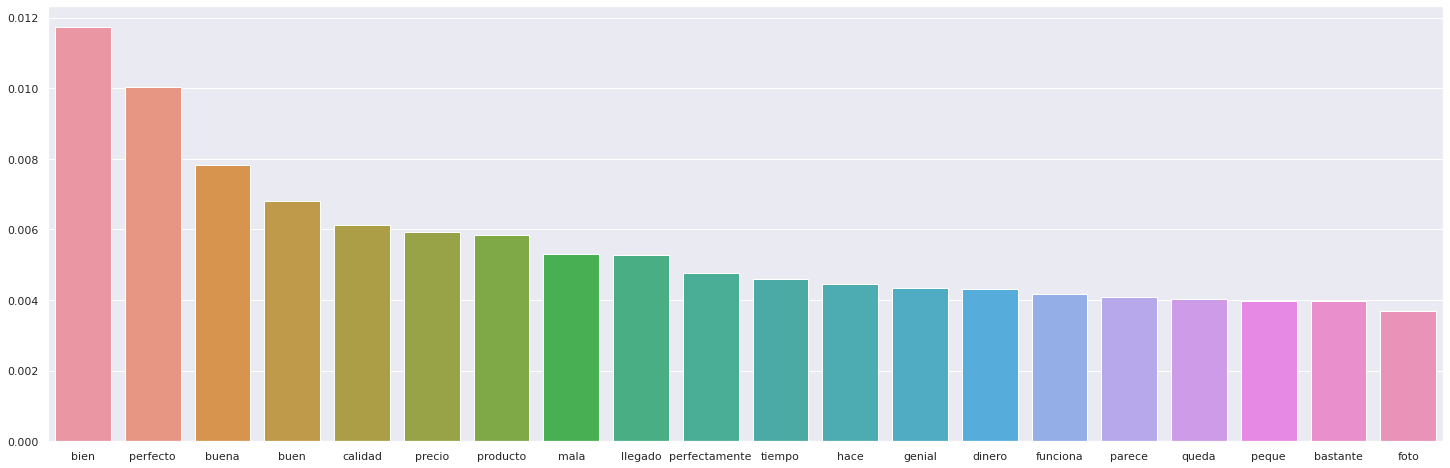

In [125]:
#c. Habíamos dicho que algo muy bueno de Random Forest era poder preguntarle por la importancia de los features que uso para clasificar. 
#Veamos en este caso cuales son las palabras que mayormente determinan el sarcasmo de una nota para este clasificador.


# Le preguntamos la importancia de cada feature (cada palabra)
importances = rf.feature_importances_
# Tomamos la lista de palabras
all_words = cou_vec.get_feature_names()
columns = all_words

# Ordenamos por importnacia y tomamos las 20 primeras
indices = np.argsort(importances)[::-1]
indices = indices[:20]
selected_columns = [columns[i] for i in indices]
selected_importances = importances[indices]

# Por ultimo graficamos
plt.figure(figsize = (25,8))
sns.barplot(selected_columns, selected_importances)
plt.show()

### SVM
Por último vamos a utilizar uno de los modelos mas prometedores para este tipo de datos donde el numero de features es comparable al número de instancias: SVM.

In [126]:
#a. Entrene un modelo de SVM Lineal y calcule su accuracy para C = 1.

# Notar que en vez de utilizar SVC, vamos a usar LinearSVC. 
# Para el Kernel Lineal, esta función es MUCHO mas rapida que la tradicional SVC.
from sklearn.svm import LinearSVC

svc = LinearSVC(C = 1)
# svc.fit(COMPLETAR)
svc.fit(xtrain,ytrain)

print("acc : ", svc.score(xtest,ytest))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


acc :  0.459975


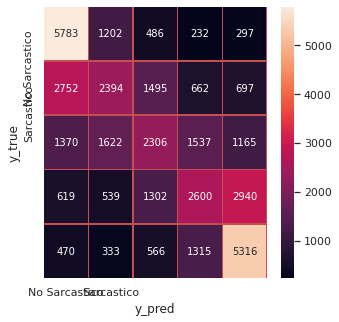

In [127]:
# y_pred = COMPLETAR
y_pred=svc.predict(xtest)
confusion(ytest,y_pred)

---

<br />
<br />

#  PREGUNTAS
<br />
<br />

---

¿De que trata?
El siguiente proyecto tiene como intención reconocer cuales son las palabras mas usadas por parte de los usuarios de amazon en la adquisición de productos. Cuando se realizó la evaluación y el puntaje asignado por parte del consumidor, teniendo en cuenta el proceso o critica que cada uno realizo.
Teniendo en cuenta lo anterior se realizó el proceso de tokenizacion y normalización esto con la finalidad de mejorar la optimización de los tres modelos que usamos, con la finalidad de conocer cual seria el mas optimo para el desarrollo.
¿Cuál es el objetivo del proyecto?
Buscar el mejor modelo que optimice la relación del puntaje, basándonos   en el lenguaje natural que se emplea por cada item o por cada critica que el consumidor genero y también generar una elección  de la palabras que mas se usan, cuando se realizan algún tipo, de queja, sugerencia o reclamos, entre cosas que se visualizaron en su desarrollo.
¿Qué tipo de feature usamos y por qué?
Par desarrollar esta pregunta nos remontamos al inicio del análisis exploratorio, ya que se debía realizar un análisis previo en la elección del mejor feature para poder darle respuesta al objetivo del proyecto, en este caso se elgio “stars” y “review_body” , ya que las dos tienen una relación directa yle dan el significado propio a la puntación.
¿Cuáles modelos se utilizaron? 
Al realizar los modelos se escogieron tres, ya que al medida que iba generando su accuarancy, este no mejoraba, ya que arrojo los siguientes resultados: Naive Bayes= 0,3845; Random Forest= 0,417925 y el SVM= 0,45; se analizo si estaba fallando con algún tipo de datos faltantes, pero no mas bien el dataset tenia todos los datos necesarios. Es importante afirmar que de acuerdo a las matriz de confusión que nos arrojó no tenían tanta relación directo en nuestro palabras seleccionadas por “Sarcasmo” y “No-Sarcasmo”, se evidencia una leve brecha entre las mismas.



